# Pytomedicine Project

Building the undirected weighted graph 

In [1]:
# import libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
from heapq import heappush, heappop 
from itertools import count
import networkx as nx 
import random
import warnings 
from networkx.drawing.nx_agraph import graphviz_layout
warnings.filterwarnings("ignore")
import importlib
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import Networks_functions as nf
from tkinter import *
from networkx.algorithms import tree
from collections import Counter
import networkx as nx
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()

In [2]:
importlib.reload(nf)

<module 'Networks_functions' from '/Users/majabratovic/Networks_functions.py'>

In [3]:
# code pre each protein
# 1) NP_004574 (dowm regulated)
# upload the data and make a proper DataFrame
data1 = pd.read_csv('proteins_1_homo.csv',delimiter=",")
genmatrix1= DataFrame(data1)
genode1=DataFrame(data1,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

In [4]:
# create a tulpe from a list to use it as nodes in network construction
my_list1 = list(genmatrix1["Official Symbol Interactor A"].values)
my_list2 = list(genmatrix1["Official Symbol Interactor B"].values)
my_list_1=my_list1+my_list2
my_tuple_1=tuple(my_list_1)

In [5]:
# calculate wight based on # of interactions
weight_node_1=Counter(my_list_1)

In [6]:
# create a list with edges
list1=list(weight_node_1.keys())
list2=list(weight_node_1.values())

In [7]:
# create a graph
G1=nx.Graph()

In [8]:
# add nodes
G1.add_node(my_tuple_1)

In [9]:
# add edges
G1.add_edge('NP_004574', list1[0], weight= list2[0])

for value in range(0,len(list1)):
   variable = G1.add_edge('NP_004574', list1[value], weight= list2[value])

In [10]:
# add additional nodes gto build a whole network
# 2) EAW53700 (dowm regulated)
data2 = pd.read_csv('proteins_2_homo.csv')
genmatrix2= DataFrame(data2)
genode2=DataFrame(data2,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list3 = list(genmatrix2["Official Symbol Interactor A"].values)
my_list4 = list(genmatrix2["Official Symbol Interactor B"].values)

my_list_2=my_list3+my_list4
my_tuple_2=tuple(my_list_2)

from collections import Counter
weight_node_2=Counter(my_list_2)

list3=list(weight_node_2.keys())
list4=list(weight_node_2.values())

import networkx as nx
G2=nx.Graph()
G2.add_node(my_tuple_2)

G2.add_edge('EAW53700', list3[0], weight= list4[0])

for value in range(0,len(list3)):
   variable = G2.add_edge('EAW53700', list3[value], weight= list4[value])

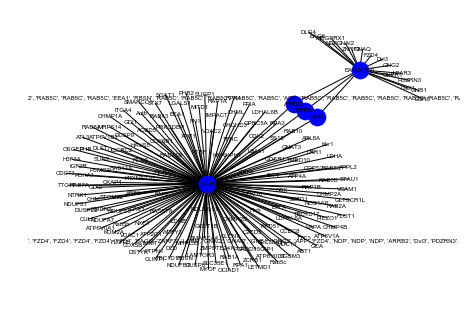

In [12]:
# create a network netween two molecus and color the nodes with the degree >1 in blue
# create a graph
U_two_nodes=nx.Graph()
U_two_nodes.add_edges_from(G1.edges()+G2.edges())
U_two_nodes.add_nodes_from(G1.nodes()+G2.nodes())

# find the degree
info=U_two_nodes.degree(nbunch=None, weight=None)
DataFrame(info, index=[0])

# select overlap i.e. nodes with degree >1
overlap_nodes=list(k for k, v in info.items() if v > 1)

# build two molecules network, and select nodes with the degree <1
single_nodes=list(k for k, v in info.items() if v <= 1)

#create a graph
fig = plt.figure()
nx.draw(U_two_nodes, with_labels=True, nodelist=overlap_nodes,node_color='b', font_size=6)
plt.show()

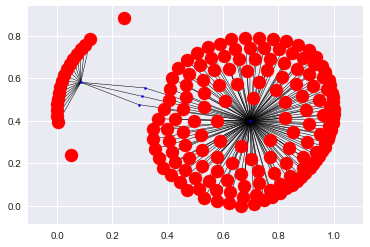

In [70]:
#  diffrent visualisation of the two molecule network
fig = plt.figure()
layout = nx.spring_layout(U_two_nodes,iterations=1000)
nx.draw_networkx_nodes(U_two_nodes, layout, nodelist=overlap_nodes, node_color='b', node_size=len(overlap_nodes))
nx.draw_networkx_nodes(U_two_nodes, layout, nodelist=single_nodes, node_color='r', node_size=len(single_nodes))
nx.draw_networkx_edges(U_two_nodes, layout, width=0.5, dge_color="ccccc")
plt.show()

In [19]:
#3) CAG46507 (dowm regulated)
data3 = pd.read_csv('proteins_3_homo.csv',delimiter=",")
genmatrix3= DataFrame(data3)
genode3=DataFrame(data3,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list5 = list(genmatrix3["Official Symbol Interactor A"].values)
my_list6 = list(genmatrix3["Official Symbol Interactor B"].values)
my_list_3=my_list5+my_list6
my_tuple_3=tuple(my_list_3)

from collections import Counter
weight_node_3=Counter(my_list_3)
weight_node_3

list5=list(weight_node_3.keys())
list6=list(weight_node_3.values())

import networkx as nx
G3=nx.Graph()
G3.add_node(my_tuple_3)

G3.add_edge('CAG46507', list5[0], weight= list6[0])

for value in range(0,len(list5)):
   variable = G3.add_edge('CAG46507', list5[value], weight= list6[value])

In [20]:
# 4) EAW98517 (dowm regulated)
data4 = pd.read_csv('proteins_4_homo.csv',delimiter=",")
genmatrix4= DataFrame(data4)
genode4=DataFrame(data4,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list7 = list(genmatrix4["Official Symbol Interactor A"].values)
my_list8 = list(genmatrix4["Official Symbol Interactor B"].values)
my_list_4=my_list7+my_list8
my_tuple_4=tuple(my_list_4)

from collections import Counter
weight_node_4=Counter(my_list_4)
weight_node_4

list7=list(weight_node_4.keys())
list8=list(weight_node_4.values())

import networkx as nx
G4=nx.Graph()
G4.add_node(my_tuple_4)
G4.add_edge('EAW98517', list7[0], weight= list8[0])

for value in range(0,len(list7)):
   variable = G4.add_edge('EAW98517', list7[value], weight= list8[value])

In [21]:
# 5) NP_006588 (up reguated)
data5 = pd.read_csv('proteins_5_homo.csv',delimiter=",")
genmatrix5= DataFrame(data5)
genode5=DataFrame(data5,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list9 = list(genmatrix5["Official Symbol Interactor A"].values)
my_list10 = list(genmatrix5["Official Symbol Interactor B"].values)
my_list_5=my_list9+my_list10
my_tuple_5=tuple(my_list_5)

from collections import Counter
weight_node_5=Counter(my_list_5)
weight_node_5

list9=list(weight_node_5.keys())
list10=list(weight_node_5.values())

import networkx as nx
G5=nx.Graph()
G5.add_node(my_tuple_5)

G5.add_edge('NP_006588', list9[0], weight= list10[0])

for value in range(0,len(list9)):
   variable = G5.add_edge('NP_006588', list9[value], weight= list10[value])


In [22]:
# 6) ABB01006 (up reguated)
data6 = pd.read_csv('proteins_6_homo.csv',delimiter=",")
genmatrix6= DataFrame(data6)
genode6=DataFrame(data6,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list11 = list(genmatrix6["Official Symbol Interactor A"].values)
my_list12 = list(genmatrix6["Official Symbol Interactor B"].values)
my_list_6=my_list11+my_list12
my_tuple_6=tuple(my_list_6)

from collections import Counter
weight_node_6=Counter(my_list_6)

list11=list(weight_node_6.keys())
list12=list(weight_node_6.values())

import networkx as nx
G6=nx.Graph()
G6.add_node(my_tuple_6)

G6.add_edge('ABB01006', list11[0], weight= list12[0])

for value in range(0,len(list11)):
   variable = G6.add_edge('ABB01006', list11[value], weight= list12[value])

In [23]:
# 7) CAI64497 (up reguated)
data7 = pd.read_csv('proteins_7_homo.csv',delimiter=",")
genmatrix7= DataFrame(data7)
genode7=DataFrame(data7,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list13 = list(genmatrix7["Official Symbol Interactor A"].values)
my_list14 = list(genmatrix7["Official Symbol Interactor B"].values)
my_list_7=my_list13+my_list14
my_tuple_7=tuple(my_list_7)

from collections import Counter
weight_node_7=Counter(my_list_7)

list13=list(weight_node_7.keys())
list14=list(weight_node_7.values())

import networkx as nx
G7=nx.Graph()
G7.add_node(my_tuple_7)

G7.add_edge('CAI64497', list13[0], weight= list14[0])

for value in range(0,len(list13)):
   variable = G7.add_edge('CAI64497', list13[value], weight= list14[value])

In [24]:
# 8) NP_005339 (up reguated)

data8 = pd.read_csv('proteins_8_homo.csv',delimiter=",")
genmatrix8= DataFrame(data8)
genode8=DataFrame(data8,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list13 = list(genmatrix8["Official Symbol Interactor A"].values)
my_list14 = list(genmatrix8["Official Symbol Interactor B"].values)
my_list_8=my_list13+my_list14
my_tuple_8=tuple(my_list_8)

from collections import Counter
weight_node_8=Counter(my_list_8)

list13=list(weight_node_8.keys())
list14=list(weight_node_8.values())

import networkx as nx
G8=nx.Graph()
G8.add_node(my_tuple_8)

G8.add_edge('NP_005339', list13[0], weight= list14[0])

for value in range(0,len(list13)):
   variable = G8.add_edge('NP_005339', list13[value], weight= list14[value])

In [25]:
# 9) P43358 (up reguated)

data9 = pd.read_csv('proteins_9_homo.csv',delimiter=",")
genmatrix9= DataFrame(data9)
genode9=DataFrame(data9,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list15 = list(genmatrix9["Official Symbol Interactor A"].values)
my_list16 = list(genmatrix9["Official Symbol Interactor B"].values)
my_list_9=my_list15+my_list16
my_tuple_9=tuple(my_list_9)

from collections import Counter
weight_node_9=Counter(my_list_9)

list15=list(weight_node_9.keys())
list16=list(weight_node_9.values())

import networkx as nx
G9=nx.Graph()
G9.add_node(my_tuple_9)

G9.add_edge('P43358', list15[0], weight= list16[0])

for value in range(0,len(list15)):
   variable = G9.add_edge('P43358', list15[value], weight= list16[value])

In [26]:
# 10) NP_037473 (up reguated)

data10 = pd.read_csv('proteins_10_homo.csv',delimiter=",")
genmatrix10= DataFrame(data10)
genode10=DataFrame(data10,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list17 = list(genmatrix10["Official Symbol Interactor A"].values)
my_list18 = list(genmatrix10["Official Symbol Interactor B"].values)
my_list_10=my_list17+my_list18
my_tuple_10=tuple(my_list_10)

from collections import Counter
weight_node_10=Counter(my_list_10)

list17=list(weight_node_10.keys())
list18=list(weight_node_10.values())

import networkx as nx
G10=nx.Graph()
G10.add_node(my_tuple_10)

G10.add_edge('NP_037473', list17[0], weight= list18[0])

for value in range(0,len(list17)):
   variable = G10.add_edge('NP_037473', list17[value], weight= list18[value])

In [27]:
# 11) EAW86495 (up reguated)

data11 = pd.read_csv('proteins_11_homo.csv',delimiter=",")
genmatrix11= DataFrame(data11)
genode11=DataFrame(data11,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list19 = list(genmatrix11["Official Symbol Interactor A"].values)
my_list20 = list(genmatrix11["Official Symbol Interactor B"].values)
my_list_11=my_list19+my_list20
my_tuple_11=tuple(my_list_11)

from collections import Counter
weight_node_11=Counter(my_list_11)

list19=list(weight_node_11.keys())
list20=list(weight_node_11.values())

import networkx as nx
G11=nx.Graph()
G11.add_node(my_tuple_11)

G11.add_edge('EAW86495', list19[0], weight= list20[0])

for value in range(0,len(list19)):
   variable = G11.add_edge('EAW86495', list19[value], weight= list20[value])

In [28]:
# 12) AAH51814 (up reguated)

data12 = pd.read_csv('proteins_12_homo.csv',delimiter=",")
genmatrix12= DataFrame(data12)
genode12=DataFrame(data11,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list21 = list(genmatrix12["Official Symbol Interactor A"].values)
my_list22 = list(genmatrix12["Official Symbol Interactor B"].values)
my_list_12=my_list21+my_list22
my_tuple_12=tuple(my_list_12)

from collections import Counter
weight_node_12=Counter(my_list_12)

list21=list(weight_node_12.keys())
list22=list(weight_node_12.values())

import networkx as nx
G12=nx.Graph()
G12.add_node(my_tuple_12)

G12.add_edge('AAH51814', list21[0], weight= list22[0])

for value in range(0,len(list21)):
   variable = G12.add_edge('AAH51814', list21[value], weight= list22[value])

In [29]:
# 13) NP_001737 (up reguated)

data13 = pd.read_csv('proteins_13_homo.csv',delimiter=",")
genmatrix13= DataFrame(data13)
genode13=DataFrame(data13,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list23 = list(genmatrix13["Official Symbol Interactor A"].values)
my_list24 = list(genmatrix13["Official Symbol Interactor B"].values)
my_list_13=my_list23+my_list24
my_tuple_13=tuple(my_list_13)

from collections import Counter
weight_node_13=Counter(my_list_13)

list21=list(weight_node_13.keys())
list22=list(weight_node_13.values())

import networkx as nx
G13=nx.Graph()
G13.add_node(my_tuple_13)

G13.add_edge('NP_001737', list21[0], weight= list22[0])

for value in range(0,len(list21)):
   variable = G13.add_edge('NP_001737', list21[value], weight= list22[value])

In [30]:
# 14) AAW67757 (up reguated)

data14 = pd.read_csv('proteins_14_homo.csv',delimiter=",")
genmatrix14= DataFrame(data14)
genode14=DataFrame(data14,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list25 = list(genmatrix13["Official Symbol Interactor A"].values)
my_list26 = list(genmatrix13["Official Symbol Interactor B"].values)
my_list_14=my_list25+my_list26
my_tuple_14=tuple(my_list_14)

from collections import Counter
weight_node_14=Counter(my_list_14)

list25=list(weight_node_14.keys())
list26=list(weight_node_14.values())

import networkx as nx
G14=nx.Graph()
G14.add_node(my_tuple_14)

G14.add_edge('AAW67757', list25[0], weight= list26[0])

for value in range(0,len(list25)):
   variable = G14.add_edge('AAW67757', list25[value], weight= list26[value])

In [31]:
# 15) NP_006380 (up reguated)

data15 = pd.read_csv('proteins_15_homo.csv',delimiter=",")
genmatrix15= DataFrame(data15)
genode15=DataFrame(data15,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list27 = list(genmatrix15["Official Symbol Interactor A"].values)
my_list28 = list(genmatrix15["Official Symbol Interactor B"].values)
my_list_15=my_list27+my_list28
my_tuple_15=tuple(my_list_15)

from collections import Counter
weight_node_15=Counter(my_list_15)

list27=list(weight_node_15.keys())
list28=list(weight_node_15.values())

import networkx as nx
G15=nx.Graph()
G15.add_node(my_tuple_15)

G15.add_edge('NP_006380', list27[0], weight= list28[0])

for value in range(0,len(list27)):
   variable = G15.add_edge('NP_006380', list27[value], weight= list28[value])

In [32]:
# 16) BAD93042 (up reguated)

data16 = pd.read_csv('proteins_16_homo.csv',delimiter=",")
genmatrix16= DataFrame(data16)
genode16=DataFrame(data16,columns=['Official Symbol Interactor A', 'Official Symbol Interactor B'])

my_list29 = list(genmatrix16["Official Symbol Interactor A"].values)
my_list30 = list(genmatrix16["Official Symbol Interactor B"].values)
my_list_16=my_list29+my_list30
my_tuple_16=tuple(my_list_16)

from collections import Counter
weight_node_16=Counter(my_list_16)

list29=list(weight_node_16.keys())
list30=list(weight_node_16.values())

import networkx as nx
G16=nx.Graph()
G16.add_node(my_tuple_16)

G16.add_edge('BAD93042', list29[0], weight= list30[0])

for value in range(0,len(list29)):
   variable = G16.add_edge('BAD93042', list29[value], weight= list30[value])

Network with all 16 proteins 

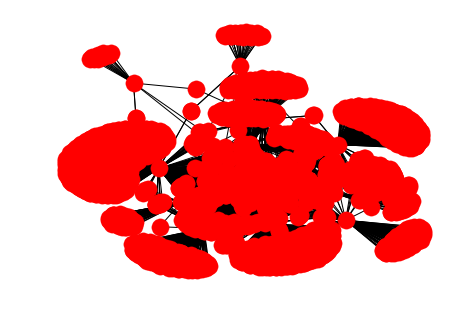

In [33]:
# Final graph
# all 16 proteins together (diffrent way)
U=nx.Graph()
U.add_edges_from(G1.edges()+G2.edges()+G3.edges()+G4.edges()+G5.edges()+G6.edges()+G7.edges()+G8.edges()+G9.edges()+G10.edges()+G11.edges()+G12.edges()+G13.edges()+G14.edges()+G15.edges()+G16.edges())
# U.add_nodes_from(U.nodes()+g.nodes())
nx.draw(U)
plt.show()

In [34]:
# . save it as U_whole
U_whole=U.copy()

Descriptive Statisctics

In [35]:
# no of nodes
list_nodes = pd.DataFrame(U_whole.nodes())
list_nodes.to_csv('list_edges.csv')
len(list_nodes)

2332

In [36]:
# no. of edges
list_edges = pd.DataFrame(U_whole.edges())
list_edges.to_csv('list_edges.csv')
len(list_edges)

3527

In [37]:
# sort nodes for the higest degree
a1=nx.degree(U_whole)
a1_sorted= sorted(a1,key=a1.get, reverse=True)

for r in a1_sorted:
     print(r,a1[r])

NP_005339 817
NP_006588 522
AAH51814 387
ABB01006 305
NP_001737 232
AAW67757 232
CAI64497 169
CAG46507 157
NP_004574 156
EAW98517 153
BAD93042 136
EAW86495 80
NP_006380 75
NP_037473 55
P43358 32
EAW53700 19
NTRK1 14
CUL7 12
FBXO6 11
FN1 10
CUL3 10
CDK2 9
CDC73 9
HDAC5 9
VCP 9
U2AF2 9
STAU1 8
CCDC8 8
APP 8
HUWE1 8
FUS 8
EGFR 8
VCAM1 7
ITGA4 7
NXF1 7
DLST 7
VDAC1 7
CDH1 7
CDC5L 7
MCM2 7
SNW1 7
DLD 6
UQCRC2 6
SOAT1 6
ATF2 6
UBL4A 6
env 6
ADRB2 6
OBSL1 6
ESRRB 6
CYLD 6
ESR1 6
CFTR 6
COPS5 6
CAND1 6
HSPA5 6
HNRNPA1 6
GBA 6
RFWD3 6
SLC9A1 6
RAB1B 5
TP53 5
RAF1 5
RNF2 5
UBC 5
AI837181 5
EED 5
DDOST 5
LMAN1 5
Mapk13 5
ABL1 5
BRCA1 5
DNAJA1 5
MDM2 5
CUL2 5
CUL1 5
HDAC6 5
TUBG1 5
PDIA3 5
GAPDH 5
GANAB 5
CLU 5
H2AFX 5
EWSR1 5
RPA1 4
RPA2 4
RPA3 4
MOV10 4
ATL3 4
Ksr1 4
RAB1A 4
RAB2A 4
RPN1 4
PHB 4
CD4 4
XPO1 4
TRAF3IP1 4
C1QBP 4
SUZ12 4
CLTC 4
COX2 4
Bmpr1a 4
RPL7 4
HSP90AB1 4
BCAP31 4
RAD21 4
ISG15 4
PAN2 4
ILK 4
CRY2 4
IPO9 4
KPNA4 4
HSPA8 4
BAG3 4
STUB1 4
PARK2 4
SOD1 4
HSP90AA1 4
PSMA3 4
PARD3

FCRL3 1
C20orf96 1
TSPYL6 1
MVP 1
IL17RC 1
ARHGEF16 1
CHI3L1 1
CDKL3 1
MPZL1 1
RCCD1 1
GLIPR1 1
NOA1 1
TM4SF1 1
ERH 1
FBP1 1
PPP1R12B 1
RNPS1 1
HNRNPA3 1
SAMM50 1
SEC24C 1
RPL18A 1
NECAP2 1
RPL8 1
SEC31A 1
POU2F1 1
ASNA1 1
TUBA4B 1
YARS 1
DNAJB6 1
GABRB1 1
HSPA4L 1
AMT 1
NMI 1
TRIM38 1
APOA1BP 1
DNAJC1 1
DNAJC13 1
FDPS 1
LMNB1 1
NACA 1
RPL13A 1
RNF207 1
CD207 1
ABL2 1
GAK 1
HIST2H3PS2 1
RPRD2 1
TBCE 1
C6orf106 1
SRP54 1
TACC3 1
MAPRE2 1
ZNF703 1
KCTD15 1
HBB 1
HBA2 1
HDLBP 1
HIST1H1B 1
NFS1 1
MAP2K2 1
QRICH1 1
ENDOG 1
CKAP5 1
PPP1R8 1
MAVS 1
RNF25 1
MAD1L1 1
FOXC1 1
ATF1 1
CSTF3 1
ALB 1
CYB5R3 1
CSDE1 1
MYB 1
CREBBP 1
DHFR 1
CA2 1
CASP3 1
ALDH2 1
SRRM2 1
PPP2R2C 1
SPG20 1
PCK1 1
ASB9 1
HSPA14 1
PAXIP1 1
HCVgp1 1
PLG 1
CLEC7A 1
DDX39B 1
EIF4E 1
EIF5A 1
GDA 1
GSR 1
MAPK14 1
NAGK 1
OXCT1 1
PTMS 1
C11orf58 1
SMS 1
THOP1 1
TRIM63 1
NFAM1 1
SLC25A41 1
ATP5F1 1
TAZ 1
DCAF5 1
MRPL4 1
OXNAD1 1
SIRT4 1
QTRT1 1
MRPL37 1
TTC39B 1
THBS3 1
KIAA0101 1
KIF2C 1
PREP 1
REXO2 1
SCARNA22 1
PLCG2 1
DDB2 1


In [38]:
# sort nodes for the higest betweeness centrality
a2=nx.betweenness_centrality(U_whole)
a2_sorted= sorted(a2,key=a2.get, reverse=True)

for r in a2_sorted:
     print(r,a2[r])

NP_005339 0.4723494667086117
NP_006588 0.27768797863429434
AAH51814 0.22204659641291669
ABB01006 0.16370876028154133
NP_004574 0.08922140972907636
EAW98517 0.08048996082810757
CAG46507 0.0697424396227063
NP_001737 0.06679477438923345
AAW67757 0.06679477438923345
BAD93042 0.06564739196995312
CAI64497 0.061279196271432024
EAW86495 0.03703195866450052
APP 0.028927247306337955
NP_006380 0.026263835979786314
NTRK1 0.025164439798103833
P43358 0.021552601348559876
NP_037473 0.019901498915447215
FN1 0.016552634273477012
CDC73 0.014348215482287952
FBXO6 0.014080979510562381
CDK2 0.013772078846973599
CUL7 0.012720282909015893
CUL3 0.012568176972793022
EAW53700 0.012093671551037502
U2AF2 0.011130630226684564
VCAM1 0.010850625295344528
VCP 0.010649509163065961
HDAC5 0.010190450974025357
NXF1 0.009577539294223433
FUS 0.00918334697401037
STAU1 0.008962492557209229
ITGA4 0.00764104463958829
EGFR 0.007582416849989704
CDH1 0.007426647680339699
HUWE1 0.007048984550721716
CDC5L 0.006942231856891192
MCM2 

CAMKMT 0.00042841745820588263
METTL22 0.00042841745820588263
SLC12A3 0.00042841745820588263
ST13 0.00042841745820588263
HIF1A 0.00042841745820588263
JUN 0.00042841745820588263
TARDBP 0.00042841745820588263
CDKN2A 0.00042841745820588263
HSPA6 0.00042841745820588263
RPS6KA3 0.00042841745820588263
CDKN1A 0.00042841745820588263
MCF2 0.00042841745820588263
TSSK1B 0.00042841745820588263
CCDC117 0.00042841745820588263
DNAJA2 0.00042841745820588263
RPLP0 0.00042841745820588263
NPHP4 0.00042841745820588263
Bag2 0.00042841745820588263
MCM5 0.00042841745820588263
KCNA5 0.00042841745820588263
CDC37 0.00042841745820588263
KLHL34 0.00042841745820588263
NOX5 0.00042841745820588263
KLHL10 0.00042841745820588263
DET1 0.00042841745820588263
KLHL36 0.00042841745820588263
THAP4 0.00042841745820588263
KBTBD4 0.00042841745820588263
CDK3 0.00042841745820588263
DDX59 0.00042841745820588263
PRKDC 0.00042841745820588263
SSBP1 0.00042841745820588263
RPS15A 0.00042841745820588263
NLRP12 0.00042841745820588263
TTC

F12 0.0
GK2 0.0
TAF6L 0.0
DOCK5 0.0
FCRL3 0.0
C20orf96 0.0
TSPYL6 0.0
MVP 0.0
IL17RC 0.0
ARHGEF16 0.0
CHI3L1 0.0
CDKL3 0.0
MPZL1 0.0
RCCD1 0.0
GLIPR1 0.0
NOA1 0.0
TM4SF1 0.0
ERH 0.0
FBP1 0.0
PPP1R12B 0.0
RNPS1 0.0
HNRNPA3 0.0
SAMM50 0.0
SEC24C 0.0
RPL18A 0.0
NECAP2 0.0
RPL8 0.0
SEC31A 0.0
POU2F1 0.0
ASNA1 0.0
TUBA4B 0.0
YARS 0.0
DNAJB6 0.0
GABRB1 0.0
HSPA4L 0.0
AMT 0.0
NMI 0.0
TRIM38 0.0
APOA1BP 0.0
DNAJC1 0.0
DNAJC13 0.0
FDPS 0.0
LMNB1 0.0
NACA 0.0
RPL13A 0.0
RNF207 0.0
CD207 0.0
ABL2 0.0
GAK 0.0
HIST2H3PS2 0.0
RPRD2 0.0
TBCE 0.0
C6orf106 0.0
SRP54 0.0
TACC3 0.0
MAPRE2 0.0
ZNF703 0.0
KCTD15 0.0
HBB 0.0
HBA2 0.0
HDLBP 0.0
HIST1H1B 0.0
NFS1 0.0
MAP2K2 0.0
QRICH1 0.0
ENDOG 0.0
CKAP5 0.0
PPP1R8 0.0
MAVS 0.0
RNF25 0.0
MAD1L1 0.0
FOXC1 0.0
ATF1 0.0
CSTF3 0.0
ALB 0.0
CYB5R3 0.0
CSDE1 0.0
MYB 0.0
CREBBP 0.0
DHFR 0.0
CA2 0.0
CASP3 0.0
ALDH2 0.0
SRRM2 0.0
PPP2R2C 0.0
SPG20 0.0
PCK1 0.0
ASB9 0.0
HSPA14 0.0
PAXIP1 0.0
HCVgp1 0.0
PLG 0.0
CLEC7A 0.0
DDX39B 0.0
EIF4E 0.0
EIF5A 0.0
GDA 0.0
GSR 0.0
MA

PA2G4 0.0
SND1 0.0
ANXA5 0.0
SNRPB2 0.0
EIF5B 0.0
GPI 0.0
IDH2 0.0
MRPL12 0.0
CRNN 0.0
ZNF207 0.0
CPNE3 0.0
CS 0.0
CPSF6 0.0
SRP68 0.0
MYL12B 0.0
CBS 0.0
WDHD1 0.0
HSP90B2P 0.0
EIF4A1 0.0
EEF1G 0.0
RPS19 0.0
RPL7A 0.0
EIF2AK4 0.0
COQ3 0.0
GLRX 0.0
LTA4H 0.0
PRDX5 0.0
PLS3 0.0


Degree Trimming

Trimming with the degree higher than 6

In [39]:
# remove nodes with the degree lower than 6
outdeg = nx.degree(U)
to_remove = [n for n in outdeg if outdeg[n] <= 6]
#create a new variable
U_degree6=U.remove_nodes_from(to_remove)
# keep nodes with the degree higher than 6 ( looks similar like the trim network)
to_keep = [n for n in outdeg if outdeg[n] > 6]
U_degree6=U.subgraph(to_keep)

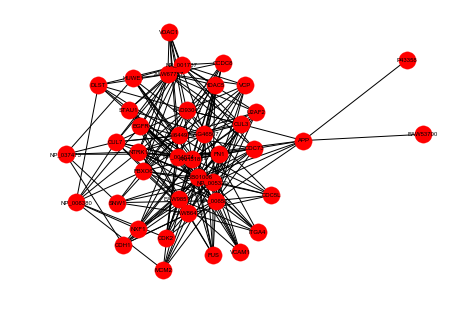

In [40]:
#X odes of degree > 6 and all organismus is the same
nx.draw(U_degree6,with_labels=True,font_size=6)
plt.show()

In [41]:
# count nb of nodes when degree higher than 6
nx.number_of_nodes(U_degree6)

41

In [42]:
# what are its nodes
nx.nodes(U_degree6)

['NP_004574',
 'CDK2',
 'FN1',
 'VCAM1',
 'ITGA4',
 'STAU1',
 'NXF1',
 'CUL7',
 'CCDC8',
 'NTRK1',
 'CDC73',
 'DLST',
 'APP',
 'VDAC1',
 'EAW53700',
 'CAG46507',
 'HDAC5',
 'CUL3',
 'FBXO6',
 'HUWE1',
 'FUS',
 'VCP',
 'U2AF2',
 'EAW98517',
 'CDH1',
 'NP_006588',
 'CDC5L',
 'EGFR',
 'MCM2',
 'SNW1',
 'ABB01006',
 'CAI64497',
 'NP_005339',
 'P43358',
 'NP_037473',
 'EAW86495',
 'AAH51814',
 'NP_001737',
 'AAW67757',
 'NP_006380',
 'BAD93042']

In [43]:
# count nb of edges when degree higher than 6
nx.number_of_edges(U_degree6)

213

In [44]:
# sort for the higest degree
a3=nx.degree(U_degree6)
a3_sorted= sorted(a3,key=a3.get, reverse=True)

for r in a3_sorted:
     print(r,a3[r])

AAH51814 23
ABB01006 22
NP_005339 19
NP_006588 18
CAI64497 18
CAG46507 16
NTRK1 14
NP_001737 14
AAW67757 14
BAD93042 14
NP_004574 13
EAW98517 13
EAW86495 13
CUL7 12
FBXO6 11
FN1 10
CUL3 10
CDK2 9
CDC73 9
HDAC5 9
VCP 9
U2AF2 9
STAU1 8
CCDC8 8
APP 8
HUWE1 8
FUS 8
EGFR 8
NP_006380 8
VCAM1 7
ITGA4 7
NXF1 7
DLST 7
VDAC1 7
CDH1 7
CDC5L 7
MCM2 7
SNW1 7
NP_037473 6
EAW53700 1
P43358 1


In [45]:
# sort for the higest betweenness centrality
a4=nx.betweenness_centrality(U_degree6)
a4_sorted= sorted(a4,key=a4.get, reverse=True)

for r in a4_sorted:
     print(r,a4[r])

AAH51814 0.11299463816154798
APP 0.10303945331927615
ABB01006 0.0990768748985868
NP_005339 0.07322912053519388
NP_006588 0.06563548596772667
CAI64497 0.05256929224662083
BAD93042 0.04391775677110075
NTRK1 0.042680309094634494
NP_004574 0.039609342253795914
CAG46507 0.037848739669306214
CUL7 0.032294558147666026
EAW86495 0.027058883775762738
NP_001737 0.02695035983414596
AAW67757 0.02695035983414596
EAW98517 0.02471096283242774
FBXO6 0.020858946423750118
FN1 0.020074604685913797
CUL3 0.01435049620672139
CDK2 0.013976639037416022
CDC73 0.012223867111171538
HUWE1 0.01209912403169302
HDAC5 0.011614751489737974
EGFR 0.011164213287452453
U2AF2 0.011033972313942179
VCP 0.010743798315342447
CCDC8 0.010044264108799536
SNW1 0.009536874683588867
STAU1 0.009479991889552222
NP_006380 0.009442749314049042
CDH1 0.009310584292931951
NXF1 0.009081398144789405
DLST 0.008570802118538643
FUS 0.008274745781898858
MCM2 0.00778380994781484
ITGA4 0.007037872709938229
VDAC1 0.0067541015404464074
VCAM1 0.006128

<Figure size 432x288 with 0 Axes>

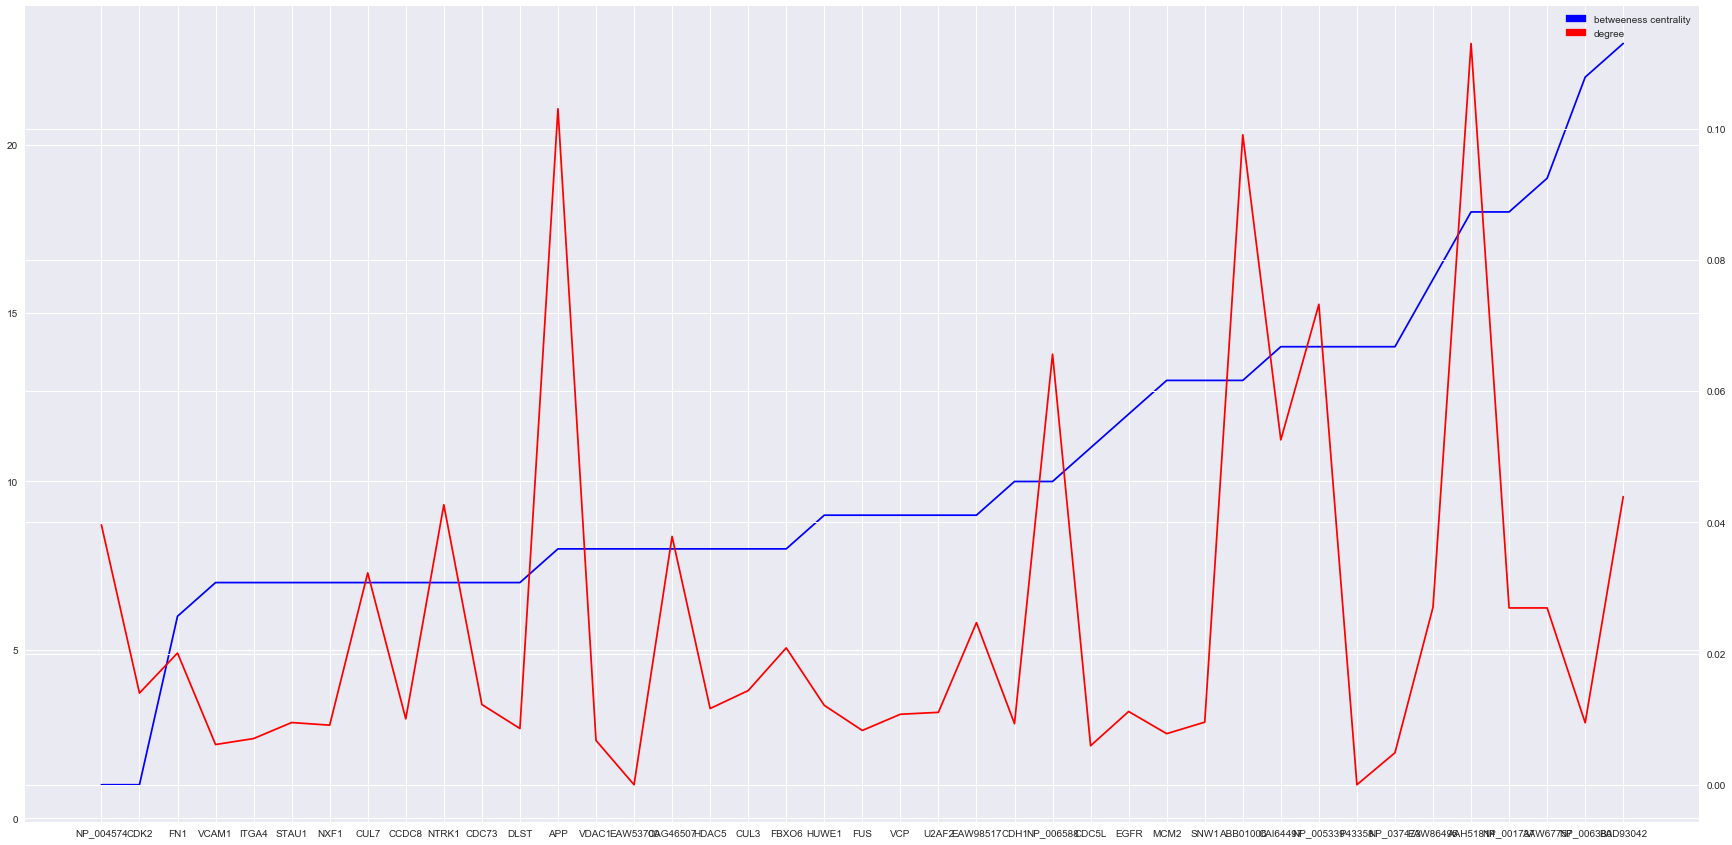

In [46]:
# visualizing betweeness and centrality in a graph
plt.figure()

degree_nodes=nx.degree(U_degree6)
centrality_nodes=nx.betweenness_centrality(U_degree6)
x0=list(degree_nodes.keys())
z0=list(centrality_nodes.values())
y0=list(degree_nodes.values())
y0_sort = sorted(y0, key=int, reverse=False)
fig, ax = plt.subplots(figsize=(30, 15)) 
        
ax.plot(x0,y0_sort, c='b')
ax1=ax.twinx()
 
ax1.plot(x0,z0, c='r')
red_patch = mpatches.Patch(color='blue', label='betweeness centrality')
blue_patch = mpatches.Patch(color='red', label='degree')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

Find Minimum spanning tree

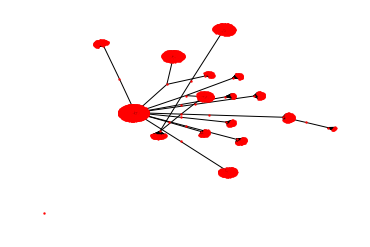

In [47]:
#print(networkx.__version__)
X= nx.to_numpy_matrix(U_whole)
mst = minimum_spanning_tree(X)
mst_new= nx.from_scipy_sparse_matrix(mst)
mst_edges= nx.generate_edgelist(mst_new)
temp_tup=tuple(nx.nodes(U_whole))
temp_U = nx.parse_edgelist(mst_edges)
Z=nx.Graph()
Z.add_node(temp_tup)
edges = nx.edges(temp_U)
Z.add_edges_from(edges)

#print(list(mst_edges))
plt.axis('off')
nx.draw(Z, node_size=4)
plt.show()

1a. In a degree trimmed network look for one identifier

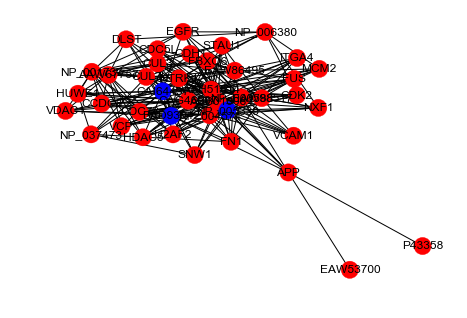

In [48]:
# response to stress in the degree trimmed network color in blue
color_map = []
for node in U_degree6:
    if node == "NP_005339":
        color_map.append('blue')# response to stress
    elif node == "BAD93042":
        color_map.append('blue')
    elif node == "CAI64497":
        color_map.append('blue')
    else: color_map.append('red') # others    
nx.draw(U_degree6,node_color = color_map,with_labels = True)
plt.show()

Shortest path analysis among these three proteins with response to stress identifier

In [49]:
# shortest path between two nodes with response to stress
nodes= nx.nodes(U_degree6)
nx.shortest_path(U_degree6,source='BAD93042',target="NP_005339")

['BAD93042', 'HDAC5', 'NP_005339']

In [50]:
# shortest path between two nodes with response to stress
nodes= nx.nodes(U_degree6)
nx.shortest_path(U,source='BAD93042',target="CAI64497")

['BAD93042', 'HDAC5', 'CAI64497']

In [51]:
# shortest path between two nodes with response to stress
nodes= nx.nodes(U)
nx.shortest_path(U,source='NP_005339',target="CAI64497")

['NP_005339', 'EGFR', 'CAI64497']

Finding the meaning

1b. Creating subgraphs

In [52]:
# upload the geoterm identifier per protein
df = pd.read_excel('functions_data.xls', sheetname='knowledge_data-2')

In [53]:
# create a dataframe per selected fature and indentifier
df_identifier=pd.DataFrame(df.groupby('protein')['identifier'].apply(list))
df_feature=pd.DataFrame(df.groupby('protein')['feature'].apply(list))
df_concat=pd.concat([df_identifier,df_feature],axis=1)

In [54]:
# create a dictionary 
path_dic_identifier = {}
for index, row in df_identifier.iterrows():
    path_dic_identifier[index] = row['identifier']

In [55]:
# for the library
all_functions=list(df.identifier.unique())

In [56]:
# missing values (remove them)
dic_list=list(path_dic_identifier.keys())
len(path_dic_identifier.keys())
remove_U=list(set(nx.nodes(U_degree6))-set(path_dic_identifier.keys()))
remove_D=list(set(path_dic_identifier.keys())-set(nx.nodes(U_degree6)))
keep = list(set(nx.nodes(U_degree6)).intersection(set(path_dic_identifier.keys())))

In [57]:
for i in remove_U:
    U_degree6.remove_node(i)

In [58]:
for i in remove_D:
    del path_dic_identifier[i]

In [59]:
# for the library
importlib.reload(nf)

# for the library
all_functions=list(df.identifier.unique())

#attribute_1= str(input('Please enter the first identifier: '))
#attribute_2= str(input('Please enter the second identifier: '))

def select(all_identifiers):

    master = Tk()

    variable = StringVar(master)
    variable.set(all_functions[0]) # default value

    w = OptionMenu(master, variable, *all_functions)
    w.pack()
    
    return("value is:" + variable.get())

    mainloop()

Meaning in the network

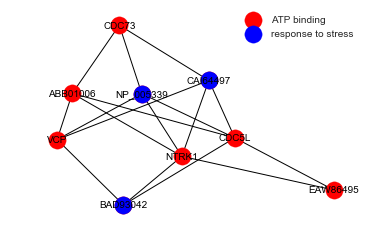

degree:


CDC5L 5
NTRK1 5
ABB01006 4
CAI64497 4
NP_005339 4
VCP 4
BAD93042 3
CDC73 3
EAW86495 2


betweeness centrality:


CDC5L 0.181547619047619
NTRK1 0.181547619047619
ABB01006 0.09345238095238093
CAI64497 0.09345238095238093
NP_005339 0.09345238095238093
VCP 0.0744047619047619
BAD93042 0.033928571428571426
CDC73 0.026785714285714284
EAW86495 0.007142857142857143


graphical representation:


<Figure size 432x288 with 0 Axes>

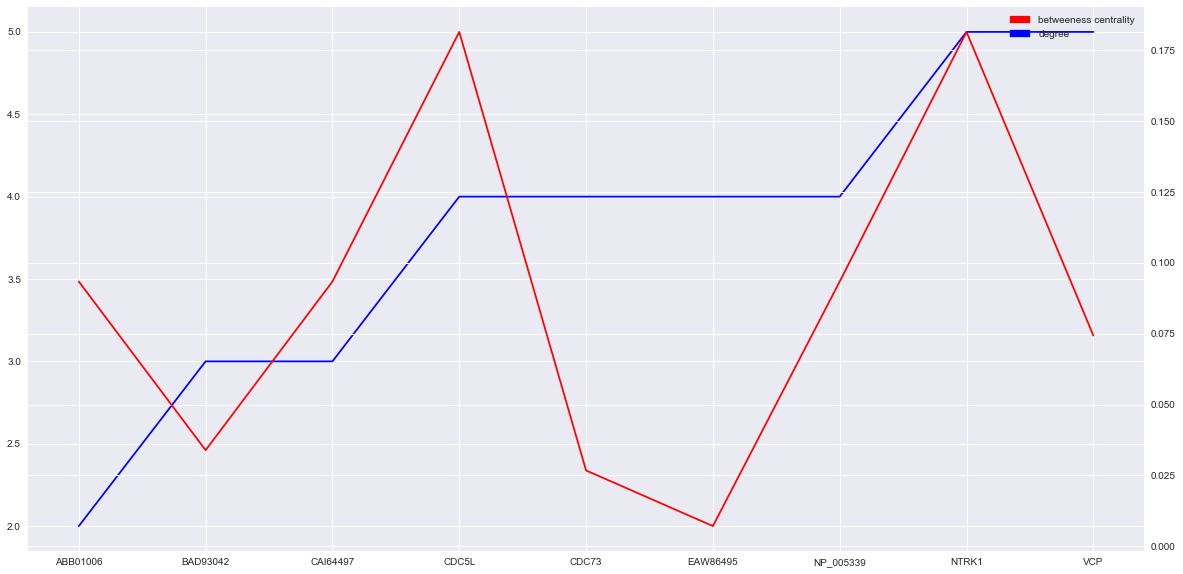

In [60]:
# two identifiers function
nf.choose_identifier('ATP binding','response to stress',path_dic_identifier,U_degree6)

degree of response to stress :


NP_005339 19
CAI64497 18
BAD93042 14


betweeness centrality of response to stress :


NP_005339 0.07322912053519388
CAI64497 0.05256929224662083
BAD93042 0.04391775677110076


graphical representation:


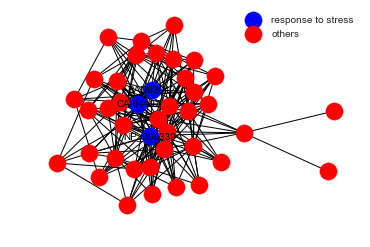

<Figure size 432x288 with 0 Axes>

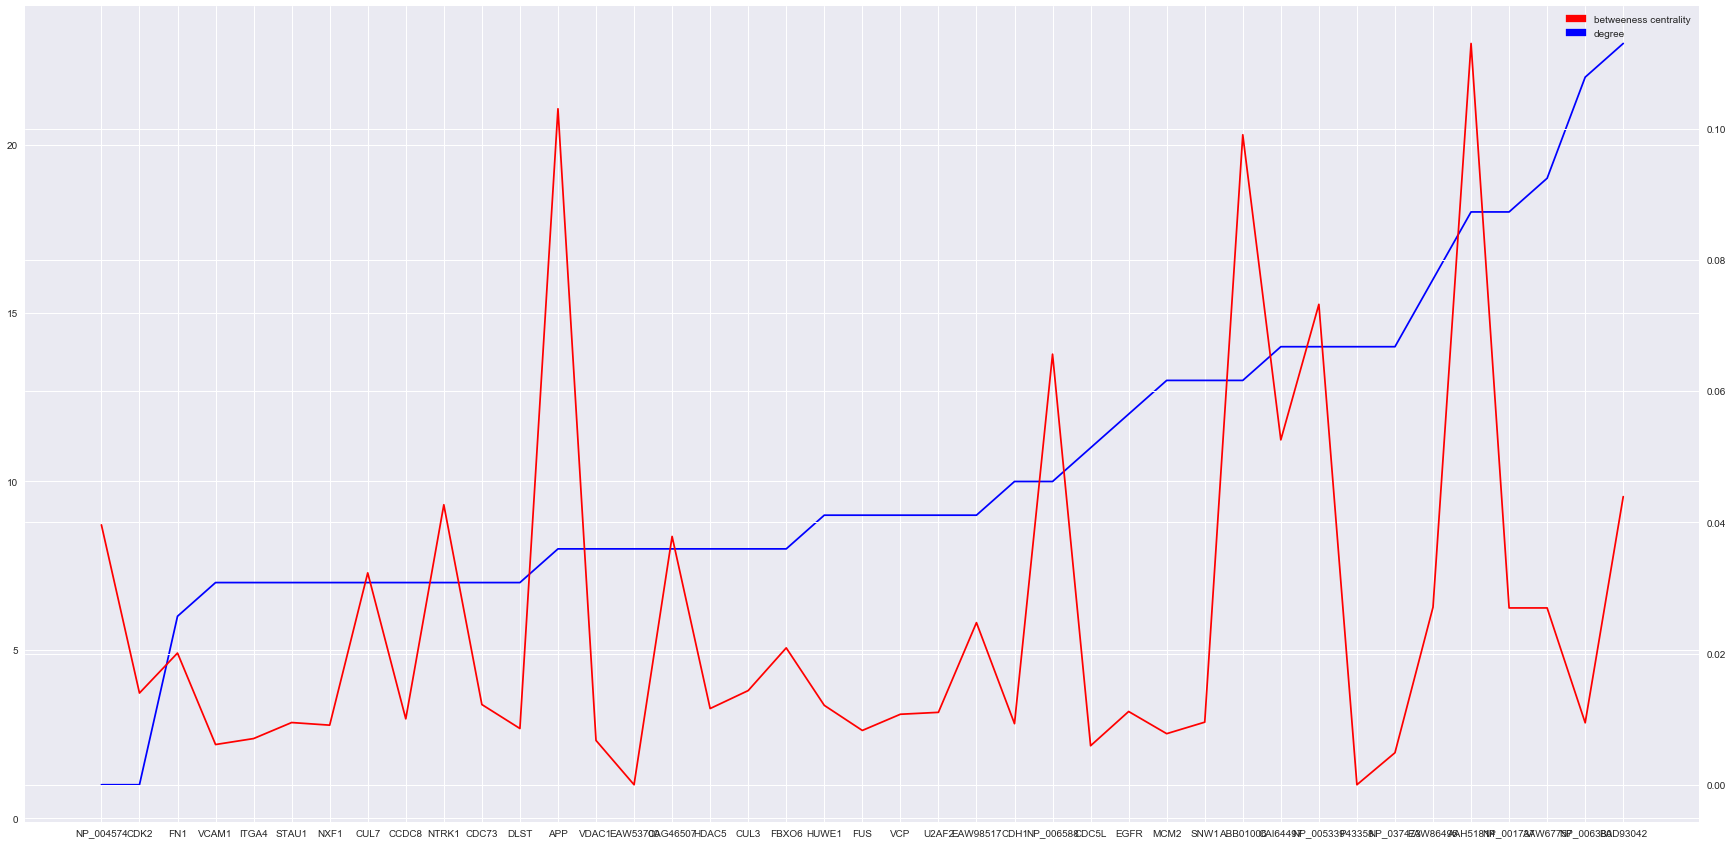

In [61]:
# select one indentifier in the MST
nf.choose_identifier_MST('response to stress',path_dic_identifier,U)

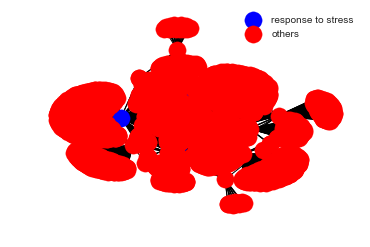

degree of response to stress :


NP_005339 817
CAI64497 169
BAD93042 136


betweeness centrality of response to stress :


NP_005339 0.4723494667086117
BAD93042 0.06564739196995312
CAI64497 0.061279196271432024


In [62]:
# select one identiofier in the whole function
nf.choose_identifier_whole('response to stress',path_dic_identifier,U_whole)

The knowlege graph expansion

In [63]:
# import data
import pandas as pd
df_data= pd.read_excel('Finalised-knowledge-graph (3).xlsx')

# delete NAN
df_data1=df_data.dropna()

# create a dictionary for the knowledge expansion via set operation
dic={}
dic2={}
for i in list(df_data1.ID.unique()):
    df_per_protein= df_data1[df_data1['ID']==i] # search for specific protein
    df_grouped=pd.DataFrame(df_per_protein.groupby("Species")['function'].apply(list)) # create a group of functions per species in a dataframe
    if 'Arabidopsis thaliana' in df_grouped.index:
        set_plant=set(df_grouped['function']['Arabidopsis thaliana'])
    else:
        set_plant=set()
    
    if 'Mus musculus' in df_grouped.index:
        set_mouse=set(df_grouped['function']['Mus musculus'])
    else:
        set_mouse=set()
        
    if 'Rattus norvegicus' in df_grouped.index:
        set_rat=set(df_grouped['function']['Rattus norvegicus'])
    else:
        set_rat=set()
        
    if 'Homo Sapiens' in df_grouped.index:
        set_human=set(df_grouped['function']['Homo Sapiens'])
    else:
        set_human=set()
    
    intersection_human_rat=set_human.intersection(set_rat)
    
    intersection_human_plant=set_human.intersection(set_plant)
    
    difference_mouse=list(set_mouse.difference(set_human))
    
    difference_rat=list(set_rat.difference(set_human))
    
    difference_plant=list(set_plant.difference(set_human))
    
    dic[i] = list(set_human),difference_mouse,difference_rat,difference_plant
    dic2[i] = len(list(set_human)),len(difference_mouse),len(difference_rat),len(difference_plant)
new_df = pd.DataFrame.from_dict(dic)
new_df = new_df.transpose()
new_df.columns=['Function_Human','Function_Mouse','Function_Rat','Function_Plant']
new_df.head()

new_df2 = pd.DataFrame.from_dict(dic2)
new_df2 = new_df2.transpose()
new_df2.columns=['Function_Human','Function_Mouse','Function_Rat','Function_Plant']
new_df2

,Function_Human,Function_Mouse,Function_Rat,Function_Plant
AAH51814,18,4,3,0
AAW67757,28,61,61,0
BAD93042,14,9,0,0
CAI64497,39,21,33,19
CCDC8,4,1,0,0
CDC5L,34,0,12,0
CDK2,23,19,13,42
CUL3,47,0,2,0
CUL7,14,3,0,0
DLST,12,40,36,1


In [74]:
# save new_df as csv file
writer = ExcelWriter('Features.xlsx')
new_df.to_excel(writer,'protein_name')
writer.save()

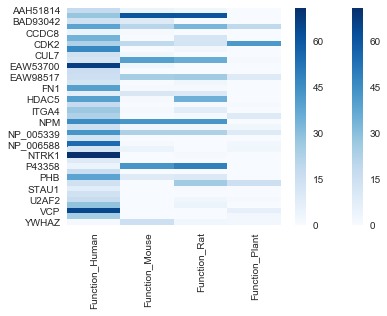

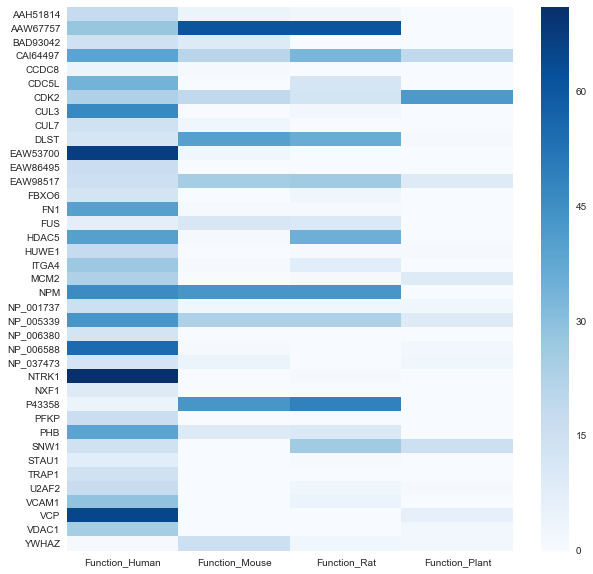

<Figure size 720x720 with 0 Axes>

In [73]:
# heat map
sns.heatmap(new_df2, cmap="Blues")
plt.figure(figsize=(10,10))
plt.show()
